In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [92]:
import warnings

warnings.filterwarnings('ignore')

In [93]:
data = pd.read_csv('IMDB-Movie-Data.csv')
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [95]:
data.shape

(1000, 12)

In [96]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [97]:
def split_genre_column(data, Actors):
    data['Actor1'] = data[Actors].str.split(',', expand=True)[0]
    data['Actor2'] = data[Actors].str.split(',', expand=True)[1]
    data['Actor3'] = data[Actors].str.split(',', expand=True)[2]
    return data

split_genre_column(data, 'Actors')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actor1,Actor2,Actor3
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Chris Pratt,Vin Diesel,Bradley Cooper
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Noomi Rapace,Logan Marshall-Green,Michael Fassbender
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Will Smith,Jared Leto,Margot Robbie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0,Chiwetel Ejiofor,Nicole Kidman,Julia Roberts
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0,Lauren German,Heather Matarazzo,Bijou Phillips
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0,Robert Hoffman,Briana Evigan,Cassie Ventura
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0,Adam Pally,T.J. Miller,Thomas Middleditch


In [98]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Actor1', 'Actor2', 'Actor3'],
      dtype='object')

In [99]:
data = data.drop(columns = ['Title', 'Description', 'Runtime (Minutes)', 'Revenue (Millions)', 'Metascore','Actors', 'Actor2', 'Actor3'])
data.head()

,Rank,Genre,Director,Year,Rating,Votes,Actor1
0,1,"Action,Adventure,Sci-Fi",James Gunn,2014,8.1,757074,Chris Pratt
1,2,"Adventure,Mystery,Sci-Fi",Ridley Scott,2012,7.0,485820,Noomi Rapace
2,3,"Horror,Thriller",M. Night Shyamalan,2016,7.3,157606,James McAvoy
3,4,"Animation,Comedy,Family",Christophe Lourdelet,2016,7.2,60545,Matthew McConaughey
4,5,"Action,Adventure,Fantasy",David Ayer,2016,6.2,393727,Will Smith


In [100]:
data.dropna(inplace=True)

In [101]:
data.drop_duplicates(inplace=True)
data.shape

(1000, 7)

In [102]:
data['Year'].unique()

array([2014, 2012, 2016, 2015, 2007, 2011, 2008, 2006, 2009, 2010, 2013],
      dtype=int64)

In [103]:
def handleYear(value):
    value = str(value).strip('()')
    return int(value)
data['Year'] = data['Year'].apply(handleYear)
data['Year'].head()

0    2014
1    2012
2    2016
3    2016
4    2016
Name: Year, dtype: int64

In [104]:
data['Genre'].unique()

array(['Action,Adventure,Sci-Fi', 'Adventure,Mystery,Sci-Fi',
       'Horror,Thriller', 'Animation,Comedy,Family',
       'Action,Adventure,Fantasy', 'Comedy,Drama,Music', 'Comedy',
       'Action,Adventure,Biography', 'Adventure,Drama,Romance',
       'Adventure,Family,Fantasy', 'Biography,Drama,History',
       'Animation,Adventure,Comedy', 'Action,Comedy,Drama',
       'Action,Thriller', 'Biography,Drama', 'Drama,Mystery,Sci-Fi',
       'Adventure,Drama,Thriller', 'Drama', 'Crime,Drama,Horror',
       'Action,Adventure,Drama', 'Drama,Thriller',
       'Action,Adventure,Comedy', 'Action,Horror,Sci-Fi',
       'Adventure,Drama,Sci-Fi', 'Action,Adventure,Western',
       'Comedy,Drama', 'Horror', 'Adventure,Drama,Fantasy',
       'Action,Crime,Thriller', 'Action,Crime,Drama',
       'Adventure,Drama,History', 'Crime,Horror,Thriller',
       'Drama,Romance', 'Comedy,Drama,Romance', 'Horror,Mystery,Thriller',
       'Crime,Drama,Mystery', 'Drama,Romance,Thriller',
       'Drama,History,T

In [105]:
def split_genre_column(data, Genre):
    data['Genre1'] = data[Genre].str.split(',', expand=True)[0]
    data['Genre2'] = data[Genre].str.split(',', expand=True)[1]
    data['Genre3'] = data[Genre].str.split(',', expand=True)[2]
    return data

split_genre_column(data, 'Genre')

,Rank,Genre,Director,Year,Rating,Votes,Actor1,Genre1,Genre2,Genre3
0,1,"Action,Adventure,Sci-Fi",James Gunn,2014,8.1,757074,Chris Pratt,Action,Adventure,Sci-Fi
1,2,"Adventure,Mystery,Sci-Fi",Ridley Scott,2012,7.0,485820,Noomi Rapace,Adventure,Mystery,Sci-Fi
2,3,"Horror,Thriller",M. Night Shyamalan,2016,7.3,157606,James McAvoy,Horror,Thriller,None
3,4,"Animation,Comedy,Family",Christophe Lourdelet,2016,7.2,60545,Matthew McConaughey,Animation,Comedy,Family
4,5,"Action,Adventure,Fantasy",David Ayer,2016,6.2,393727,Will Smith,Action,Adventure,Fantasy
...,...,...,...,...,...,...,...,...,...,...
995,996,"Crime,Drama,Mystery",Billy Ray,2015,6.2,27585,Chiwetel Ejiofor,Crime,Drama,Mystery
996,997,Horror,Eli Roth,2007,5.5,73152,Lauren German,Horror,None,None
997,998,"Drama,Music,Romance",Jon M. Chu,2008,6.2,70699,Robert Hoffman,Drama,Music,Romance
998,999,"Adventure,Comedy",Scot Armstrong,2014,5.6,4881,Adam Pally,Adventure,Comedy,None


In [106]:
data.isnull().sum()

Rank          0
Genre         0
Director      0
Year          0
Rating        0
Votes         0
Actor1        0
Genre1        0
Genre2      105
Genre3      340
dtype: int64

In [107]:
data = data.fillna(0)
data.isna().sum()

Rank        0
Genre       0
Director    0
Year        0
Rating      0
Votes       0
Actor1      0
Genre1      0
Genre2      0
Genre3      0
dtype: int64

In [108]:
G = ['Genre1', 'Genre2', 'Genre3']
for x in G:
    data[x],_ = pd.factorize(data[x])

data = data.drop(columns = ['Genre'])
data.head(3)

,Rank,Director,Year,Rating,Votes,Actor1,Genre1,Genre2,Genre3
0,1,James Gunn,2014,8.1,757074,Chris Pratt,0,0,0
1,2,Ridley Scott,2012,7.0,485820,Noomi Rapace,1,1,0
2,3,M. Night Shyamalan,2016,7.3,157606,James McAvoy,2,2,1


In [109]:
data['Votes'].unique()

array([ 757074,  485820,  157606,   60545,  393727,   56036,  258682,
          2490,    7188,  192177,  232072,   93103,  323118,  118151,
          8612,  120259,  211760,  150823,  102061,  340798,   19053,
        134213,    1115,   38552,  127553,     222,   76193,     523,
         66540,  112813,   48123,  126030,  275510,  627797,   46165,
        411656, 1047747,  293732,  122853,     241,  120690,  135095,
           496,   37033,     279,  395025,   17818,    5103,  164567,
           987,  661608,   41362,   20221,  321933, 1791916,   49190,
        121103,  113322,    3739,  137608,  472307,   35870,  102177,
        244474,  913152,  440209,   39784,  632842,     291,   89849,
        149791,   78079,   39134,   43977,  296853,  498821, 1045588,
        959065,  552027,  147717, 1583625,  105081,  865134,  636243,
        301249,  455169,   27869,  935408,  341170,  162122,  431185,
        187547,  342429,  106463,  516895,  175067,   34110,    9247,
         10181,  937

In [110]:
def handleVotes(value):
    value = str(value).replace(',','')
    return int(value)

data['Votes'] = data['Votes'].apply(handleVotes)
data['Votes'].head()

0    757074
1    485820
2    157606
3     60545
4    393727
Name: Votes, dtype: int64

In [111]:
data['MovieAge'] = 2024 - data['Year']
data['MovieAge']

0      10
1      12
2       8
3       8
4       8
       ..
995     9
996    17
997    16
998    10
999     8
Name: MovieAge, Length: 1000, dtype: int64

In [113]:
DirectorCounts = data['Director'].value_counts()
data['DirectorPopularity'] = data['Director'].map(DirectorCounts)
ActorCounts = data['Actor1'].value_counts()
data['ActorPopularity'] = data['Actor1'].map(ActorCounts)

In [114]:
data['LogVotes'] = np.log1p(data['Votes'])
data['LogVotes']

0      13.537218
1      13.093596
2      11.967860
3      11.011159
4      12.883416
         ...    
995    10.225064
996    11.200308
997    11.166201
998     8.493310
999     9.428351
Name: LogVotes, Length: 1000, dtype: float64

In [116]:
DirectorAvgRating = data.groupby('Director')['Rating'].mean()
data['DirectorAvgRating'] = data['Director'].map(DirectorAvgRating)

ActorAvgRating = data[['Actor1']].stack().reset_index(name = 'Actor')
ActorAvgRating = ActorAvgRating.merge(data[['Rating']], left_on = 'level_0', right_index = True)
ActorAvgRating = ActorAvgRating.groupby('Actor')['Rating'].mean()
data['ActorAvgRating'] = data['Actor1'].map(ActorAvgRating)

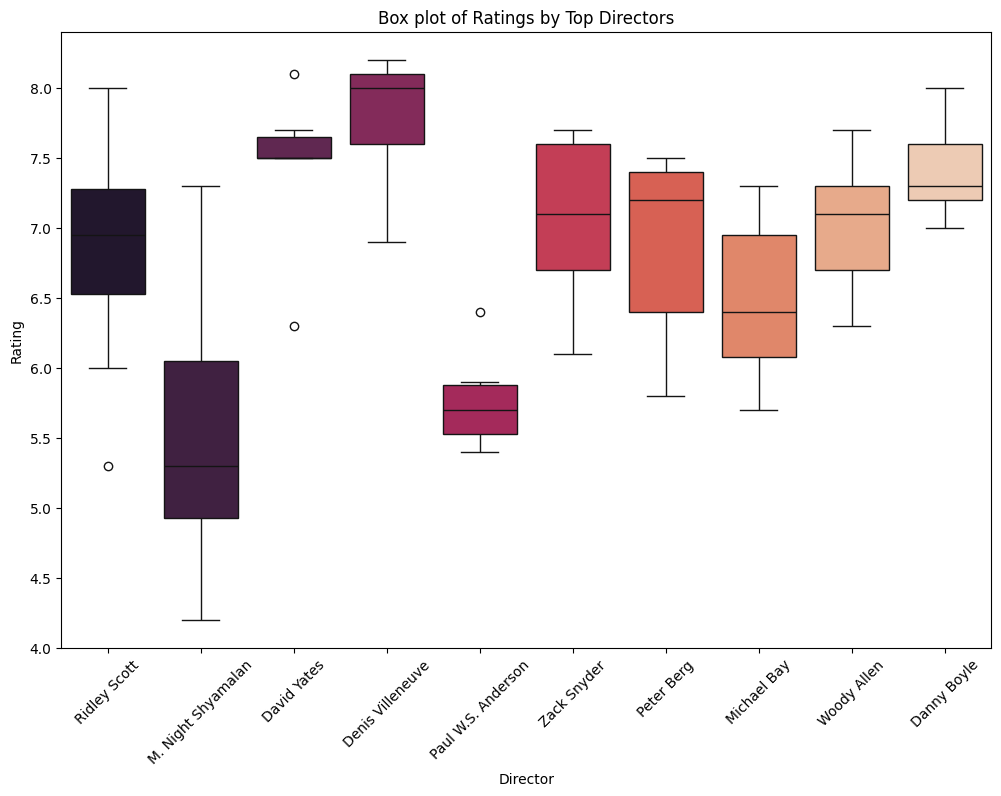

In [117]:
plt.figure(figsize = (12,8))
TopDirectors = data['Director'].value_counts().index[0:10]
sns.boxplot(data = data[data['Director'].isin(TopDirectors)], x = 'Director', y = 'Rating', palette = 'rocket')

plt.title('Box plot of Ratings by Top Directors')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

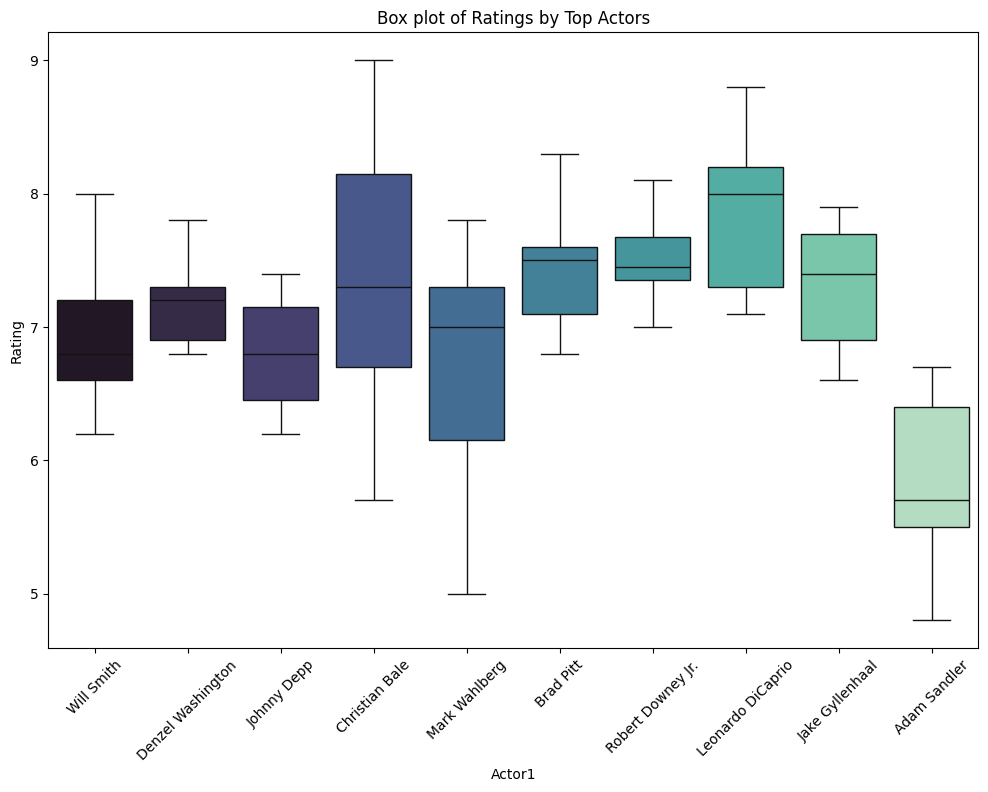

In [118]:
plt.figure(figsize = (12,8))
TopDirectors = data['Actor1'].value_counts().index[0:10]
sns.boxplot(data = data[data['Actor1'].isin(TopDirectors)], x = 'Actor1', y = 'Rating', palette = 'mako')

plt.title('Box plot of Ratings by Top Actors')
plt.xlabel('Actor1')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

<Figure size 1500x1200 with 0 Axes>

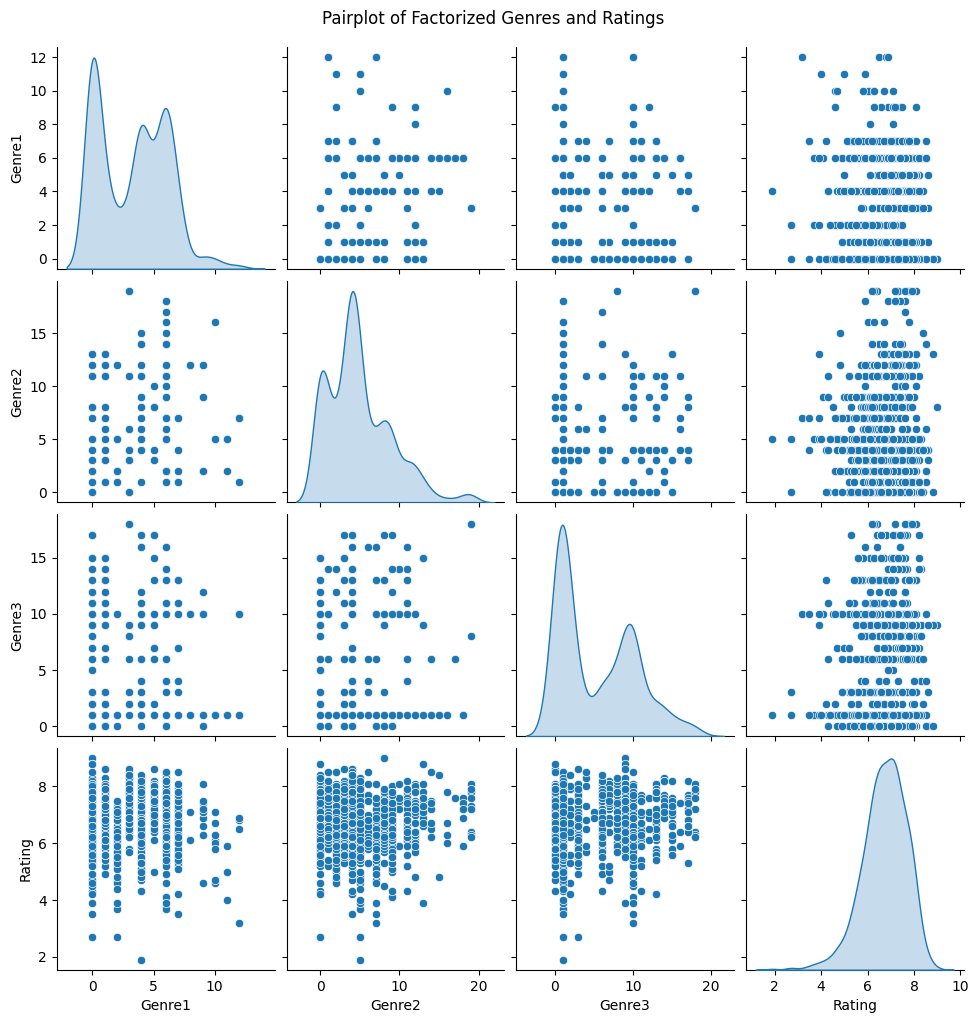

In [119]:
GenreColumns = ['Genre1', 'Genre2', 'Genre3', 'Rating']
plt.figure(figsize=(15,12))
sns.pairplot(data[GenreColumns], diag_kind='kde', kind = 'scatter')

plt.suptitle('Pairplot of Factorized Genres and Ratings', y=1.02)
plt.show()

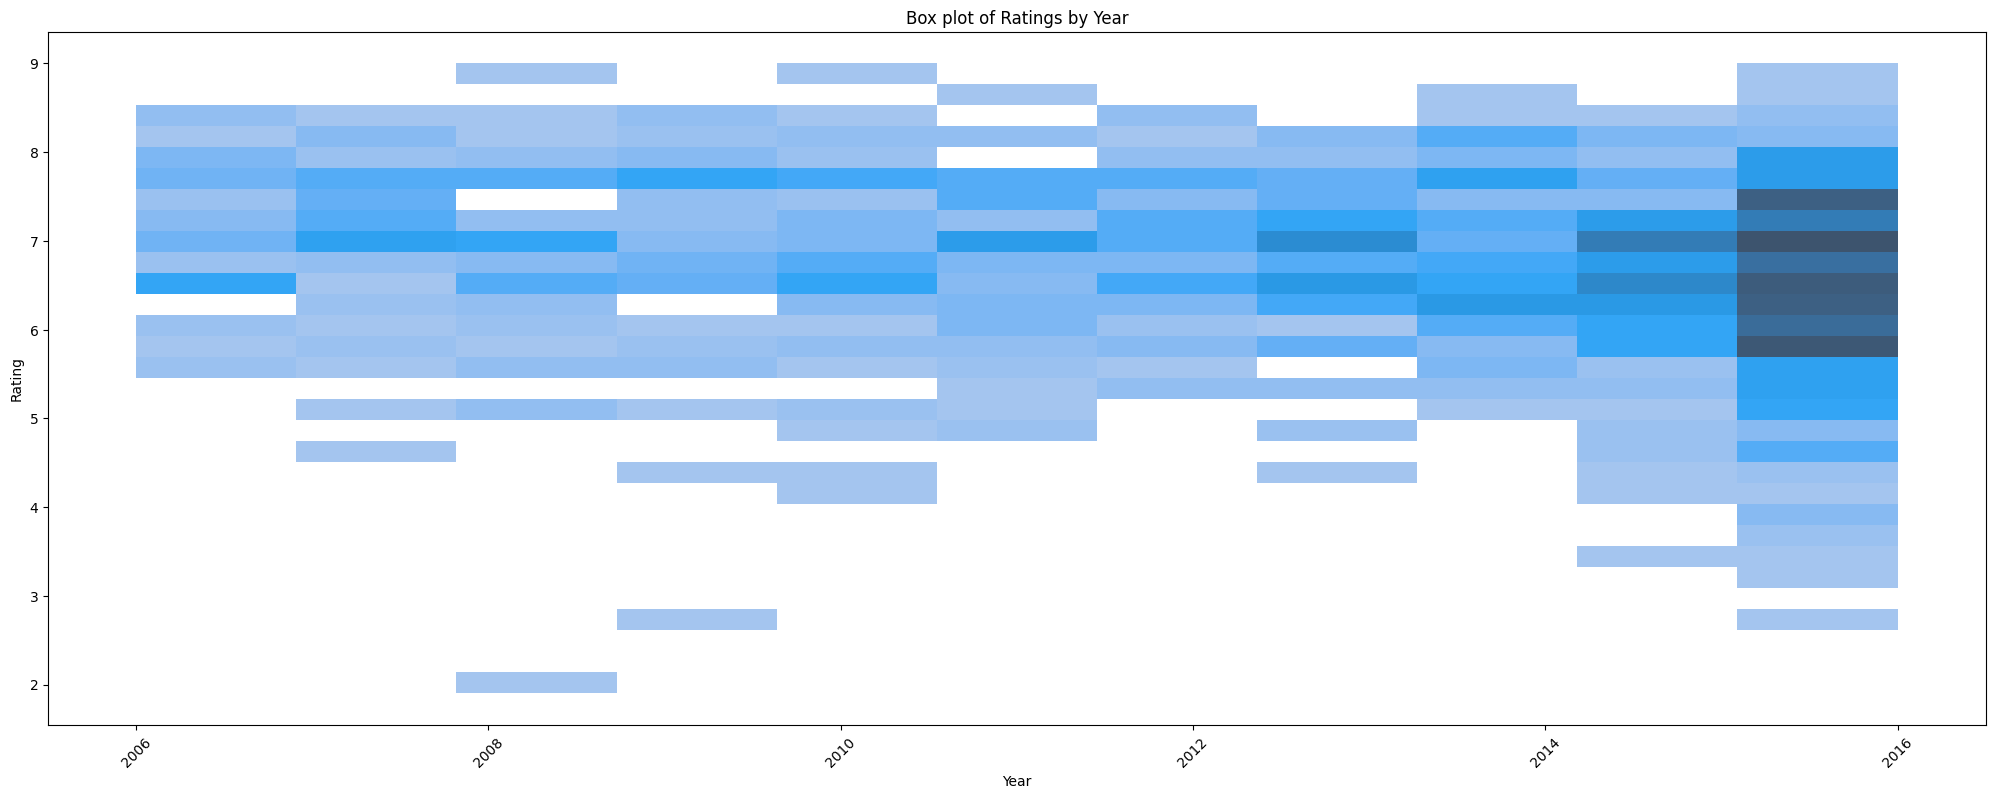

In [120]:
plt.figure(figsize = (25,9))
sns.histplot(data=data, x = 'Year', y = 'Rating', palette = 'Spectral')
sns.dark_palette("#69d", reverse = True, as_cmap = True)
plt.title('Box plot of Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

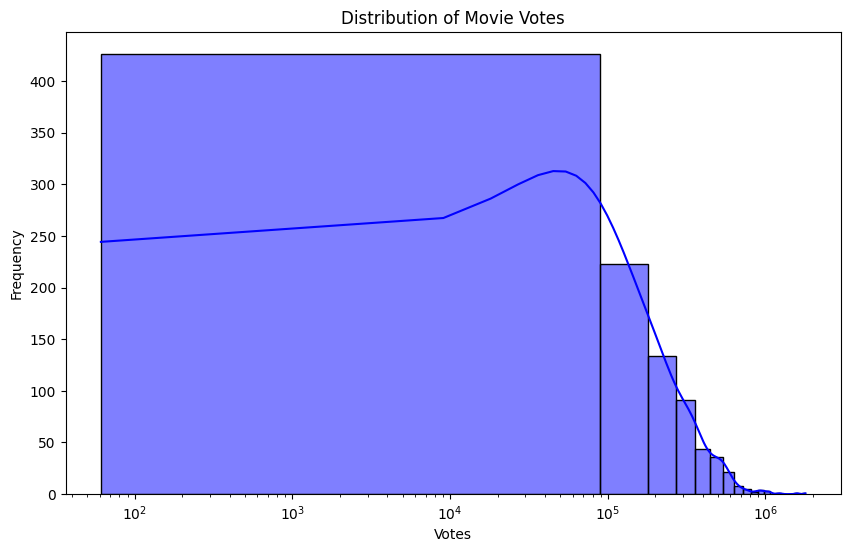

In [121]:
plt.figure(figsize = (10,6))
sns.histplot(data['Votes'], bins = 20, kde = True, color = 'blue')

plt.title('Distribution of Movie Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()

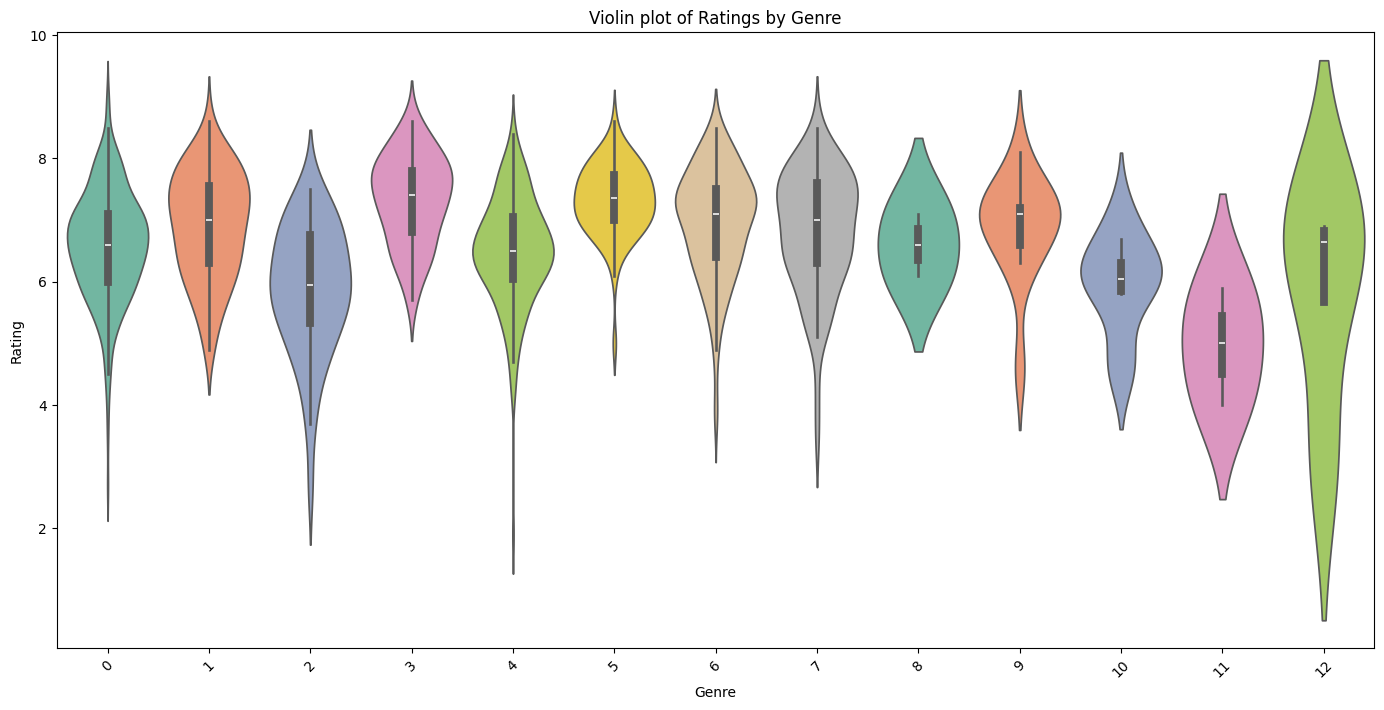

In [122]:
plt.figure(figsize = (17,8))
sns.violinplot(data = data, x = 'Genre1', y = 'Rating', palette = 'Set2')

plt.title('Violin plot of Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

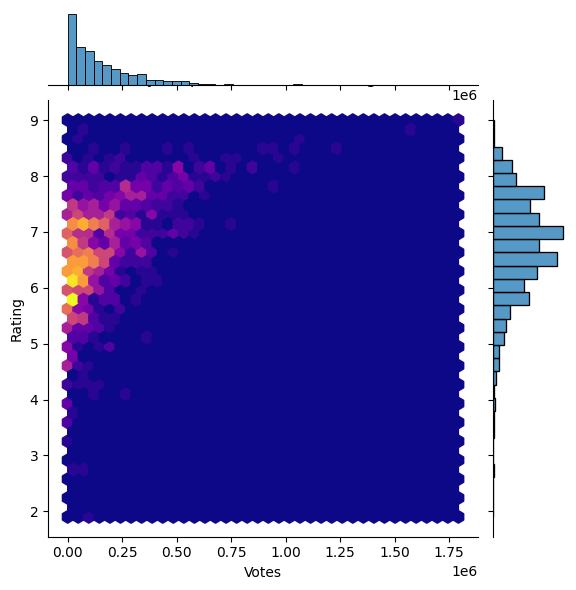

In [123]:
sns.jointplot(data = data, x = 'Votes', y = 'Rating', kind = 'hex', cmap = 'plasma')
plt.title('Joint plot of Votes vs Rating', y = 1.02)
plt.show()

In [124]:
data['Genre1 encoded'] = round(data.groupby('Genre1')['Rating'].transform('mean'),1)
data['Genre2 encoded'] = round(data.groupby('Genre2')['Rating'].transform('mean'),1)
data['Genre3 encoded'] = round(data.groupby('Genre3')['Rating'].transform('mean'),1)
data['Votes encoded'] = round(data.groupby('Votes')['Rating'].transform('mean'),1)
data['Director encoded'] = round(data.groupby('Director')['Rating'].transform('mean'),1)
data['Actor1 encoded'] = round(data.groupby('Actor1')['Rating'].transform('mean'),1)
data.head()

,Rank,Director,Year,Rating,Votes,Actor1,Genre1,Genre2,Genre3,MovieAge,...,ActorPopularity,LogVotes,DirectorAvgRating,ActorAvgRating,Genre1 encoded,Genre2 encoded,Genre3 encoded,Votes encoded,Director encoded,Actor1 encoded
0,1,James Gunn,2014,8.1,757074,Chris Pratt,0,0,0,10,...,3,13.537218,7.133333,7.633333,6.6,6.7,6.8,8.1,7.1,7.6
1,2,Ridley Scott,2012,7.0,485820,Noomi Rapace,1,1,0,12,...,2,13.093596,6.850000,5.900000,6.9,7.0,6.8,7.0,6.8,5.9
2,3,M. Night Shyamalan,2016,7.3,157606,James McAvoy,2,2,1,8,...,5,11.967860,5.533333,7.260000,5.9,6.5,6.6,7.3,5.5,7.3
3,4,Christophe Lourdelet,2016,7.2,60545,Matthew McConaughey,3,3,2,8,...,7,11.011159,7.200000,7.000000,7.3,6.8,6.7,7.2,7.2,7.0
4,5,David Ayer,2016,6.2,393727,Will Smith,0,0,3,8,...,9,12.883416,7.166667,6.977778,6.6,6.7,6.5,6.2,7.2,7.0


In [125]:
data.drop(columns = ['Genre1', 'Votes', 'Director', 'Actor1', 'Genre2', 'Genre3'], inplace = True)
data['Rating'] = round(data['Rating'], 1)

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = data.drop("Rating", axis = 1)
Y = data["Rating"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 52)

model = LinearRegression()
model.fit(X_train, Y_train)

X_test_prediction = model.predict(X_test)

mse = mean_squared_error(Y_test, X_test_prediction)
print(f"Mean Squared Error (MSE) : {mse:.2f}")

r2 = r2_score(Y_test, X_test_prediction)
print(f"R-squared score: {r2:.2f}")

Mean Squared Error (MSE) : 0.00
R-squared score: 1.00
